In [1]:
# Bibliotheken abrufen
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# URL als Variable definieren
url = "https://rodare.hzdr.de/api/records/?page=1&sort=mostrecent&size=1000"

In [3]:
# Funktion um Inhalt aus URL in r zu speichern
r = requests.get(url)

In [4]:
# JSON lesen lassen
json = r.json()

In [5]:
# Dictionary anlegen und Keys der gewünschten Werte definieren
Meta_dict = {}
Meta_dict['type'] = []
Meta_dict['license'] = []
Meta_dict['rel_id'] = []
Meta_dict['pub_date'] = []
Meta_dict['Access_Right'] = []
Meta_dict['Downloads'] = []
Meta_dict['unique_downloads'] = []
Meta_dict['unique_views'] = []
Meta_dict['views'] = []
Meta_dict['isreferencedby'] = []
Meta_dict['doi'] = []

In [6]:
# Definition einer Teilliste und for-Schleife, um den type der Records aus allen Einträgen auszulesen und aufzulisten
for record in json['hits']['hits']:
    Meta_dict['type'].append(record['metadata']['resource_type']['type'])
    if 'license' in record['metadata'].keys():
        Meta_dict['license'].append(record['metadata']['license']['id'])
    else:
        Meta_dict['license'].append('NaN')
# Neue Iteration in Liste der related identifier anlegen und dort die Bedigungen für das Auslesen definieren
    count_id = 0
    counter_2 = 0
    for identifier in record['metadata']['related_identifiers']:
        #print(identifier['relation'])
        if identifier['relation'] == 'isReferencedBy' and 'hzdr' in identifier['identifier']:
            count_id = count_id + 1
        if identifier['relation'] == 'isReferencedBy':
            counter_2 = counter_2 + 1
        #print(counter_2)
    Meta_dict['isreferencedby'].append(counter_2)
    Meta_dict['rel_id'].append(count_id)
    Meta_dict['pub_date'].append(record['created'][:10])
    Meta_dict['Access_Right'].append(record['metadata']['access_right'])
    Meta_dict['Downloads'].append(int(record['stats']['downloads']))
    Meta_dict['unique_downloads'].append(int(record['stats']['unique_downloads']))
    Meta_dict['unique_views'].append(int(record['stats']['unique_views']))
    Meta_dict['views'].append(int(record['stats']['views']))
    Meta_dict['doi'].append(record['links']['doi'])

In [7]:
# https://datatofish.com/select-rows-pandas-dataframe/

In [8]:
#for record in json['hits']['hits']:
#    counter_2 = 0
#    for identifier in record['metadata']['related_identifiers']:
#        if identifier['relation'] == 'isReferencedBy':
#            counter_2 = counter_2 + 1
#    Meta_dict['isreferencedby'].append(counter_2)

In [9]:
sum(Meta_dict['isreferencedby'])

168

In [10]:
# Umwandlung des Disctionaries in ein DataFrame 
df = pd.DataFrame(Meta_dict)

In [11]:
sum(df.isreferencedby == 1)

162

In [12]:
sum(df.isreferencedby > 1)

3

In [13]:
sum(df.type == 'dataset')

207

In [14]:
df

,type,license,rel_id,pub_date,Access_Right,Downloads,unique_downloads,unique_views,views,isreferencedby,doi
0,other,CC-BY-4.0,0,2021-08-16,open,0,0,0,0,0,https://doi.org/10.14278/rodare.1117
1,other,CC-BY-4.0,0,2021-08-16,open,0,0,0,0,0,https://doi.org/10.14278/rodare.1115
2,dataset,CC-BY-4.0,1,2021-08-12,open,0,0,4,4,1,https://doi.org/10.14278/rodare.1111
3,dataset,CC-BY-4.0,1,2021-08-09,open,2,2,18,24,1,https://doi.org/10.14278/rodare.1098
4,dataset,CC-BY-4.0,0,2021-08-09,open,0,0,5,5,0,https://doi.org/10.14278/rodare.1105
...,...,...,...,...,...,...,...,...,...,...,...
267,dataset,CC-BY-SA-4.0,0,2018-05-09,open,23,22,340,402,0,https://doi.org/10.14278/rodare.24
268,dataset,CC-BY-4.0,0,2018-04-25,open,90,33,351,425,0,https://doi.org/10.14278/rodare.16
269,dataset,CC-BY-4.0,0,2018-04-12,open,23,18,287,344,0,https://doi.org/10.14278/rodare.8
270,dataset,NaN,0,2018-03-20,restricted,0,0,257,290,0,https://doi.org/10.14278/rodare.4


In [15]:
df.iloc[0]

type                                               other
license                                        CC-BY-4.0
rel_id                                                 0
pub_date                                      2021-08-16
Access_Right                                        open
Downloads                                              0
unique_downloads                                       0
unique_views                                           0
views                                                  0
isreferencedby                                         0
doi                 https://doi.org/10.14278/rodare.1117
Name: 0, dtype: object

In [16]:
df.iloc[0][10]

'https://doi.org/10.14278/rodare.1117'

In [17]:
# https://www.python-lernen.de/python-modul-datetime.htm
from datetime import date
aktuellesDatum = date.today()
rodare_pub = date(2018,2,28)
zeitraum = aktuellesDatum - rodare_pub
print("Es sind", zeitraum.days, "Tage seit der Inbetriebnahme von RODARE vergangen")
zr = zeitraum.days
ds = zr/len(df)
lpd = df['Downloads'].sum()/zr

Es sind 1265 Tage seit der Inbetriebnahme von RODARE vergangen


In [18]:
print('Stand ('+ aktuellesDatum.strftime("%d.%m.%Y") +\
      ') - Seit Inbetriebnahme von RODARE wurden aus der Gesamtheit von ' + str(len(df)) \
      + ' Records ' + str(df['Downloads'].sum()) + ' Downloads getätigt.')

Stand (16.08.2021) - Seit Inbetriebnahme von RODARE wurden aus der Gesamtheit von 272 Records 18927 Downloads getätigt.


In [19]:
print(aktuellesDatum.strftime("%d.%m.%Y"))

16.08.2021


In [20]:
print('Seit der Inbetriebnahme von RODARE sind', zeitraum.days , 
      'Tage vergangen. \nDas entspricht eine Veröffentlichung alle', round(ds,1) ,
      'Tage und' ,round(lpd,1), 'Downloads pro Tag.')

Seit der Inbetriebnahme von RODARE sind 1265 Tage vergangen. 
Das entspricht eine Veröffentlichung alle 4.7 Tage und 15.0 Downloads pro Tag.


In [21]:
df.describe(include='all')

,type,license,rel_id,pub_date,Access_Right,Downloads,unique_downloads,unique_views,views,isreferencedby,doi
count,272,272,272.000000,272,272,272.000000,272.000000,272.000000,272.000000,272.000000,272
unique,6,10,NaN,178,4,NaN,NaN,NaN,NaN,NaN,272
top,dataset,CC-BY-4.0,NaN,2021-03-10,open,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.14278/rodare.69
freq,207,127,NaN,18,155,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,0.610294,NaN,NaN,69.584559,26.397059,96.724265,139.636029,0.617647,NaN
std,NaN,NaN,0.496078,NaN,NaN,239.561808,73.190524,101.814322,129.176629,0.509088,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,39.750000,62.750000,0.000000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,5.000000,4.000000,67.500000,106.500000,1.000000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,37.000000,20.000000,101.750000,160.000000,1.000000,NaN


In [22]:
# Berechung aller Downloads für Open Access

In [23]:
# Berechnung von Werten nach Bestimmung von Bedingungen

In [24]:
df.iloc[df.Downloads.idxmax(), 10]

'https://doi.org/10.14278/rodare.915'

In [25]:
df.shape

(272, 11)

In [26]:
# sorted_df = df.sort_values(by='publication_date', ascending=False)
# print(sorted_df)

In [27]:
# df['publication_date'] >= '2021-01-01'

In [28]:
# zurück kommt boolarray
start = list(df['pub_date'] >= '2021-01-01')
end = list(df['pub_date'] <= '2021-03-31')
date_filter = np.all(np.array([start,end]),axis=0)
#end
date_filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,

In [29]:
# zurück kommt boolarray
#df['pub_date'].all(df['pub_date'] >= '2021-01-01',df['pub_date'] <= '2021-03-31')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
#sortet_list = list(df['publication_date'][df['publication_date'] >= '2021-01-01'])
#sortet_list

In [ ]:
#sortet_list.sort()
#sortet_list

In [ ]:
#list(df['publication_date'][df['publication_date'] >= '2021-01-01']).sort()

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
len(df)

In [30]:
df['type'].value_counts()

dataset         207
software         24
image            15
other            15
video             6
presentation      5
Name: type, dtype: int64

In [31]:
df['type'].value_counts(normalize=True)

dataset         0.761029
software        0.088235
image           0.055147
other           0.055147
video           0.022059
presentation    0.018382
Name: type, dtype: float64

In [32]:
type_mode = df['type'].mode()
type_mode[0]

'dataset'

In [ ]:
df['rel_id'].isna().sum()

In [ ]:
df['Downloads'].mean()

In [ ]:
df['Downloads'].median()

In [ ]:
df['views'].median()

In [ ]:
df['Downloads'].var()

In [ ]:
df['Downloads'].std()

In [33]:
dt = df['type'].value_counts()
dt.max()
type(dt)
print(dt)

dataset         207
software         24
image            15
other            15
video             6
presentation      5
Name: type, dtype: int64


In [34]:
df.groupby(['type']).max()

,license,rel_id,pub_date,Access_Right,Downloads,unique_downloads,unique_views,views,isreferencedby,doi
type,,,,,,,,,,
dataset,NaN,2,2021-08-12,restricted,2218,910,697,848,2,https://doi.org/10.14278/rodare.998
image,NaN,1,2021-08-05,open,433,250,412,504,1,https://doi.org/10.14278/rodare.966
other,NaN,1,2021-08-16,restricted,91,51,193,232,1,https://doi.org/10.14278/rodare.920
presentation,CC-BY-4.0,0,2020-01-14,open,284,231,468,614,0,https://doi.org/10.14278/rodare.71
software,NaN,1,2021-08-06,restricted,120,59,416,569,1,https://doi.org/10.14278/rodare.992
video,CC-BY-4.0,1,2021-04-22,open,91,46,107,170,1,https://doi.org/10.14278/rodare.952


In [46]:
#Reduzierung der Datengrundlage und dort Werte ausgeben
df[df['type']=='dataset'].groupby(['license']).size()

license
CC-BY-1.0         4
CC-BY-4.0        88
CC-BY-NC-4.0      8
CC-BY-SA-4.0      3
NaN             104
dtype: int64

In [52]:
df[df['type']=='dataset'].count()

type                207
license             207
rel_id              207
pub_date            207
Access_Right        207
Downloads           207
unique_downloads    207
unique_views        207
views               207
isreferencedby      207
doi                 207
dtype: int64

In [54]:
df['views'].std()

129.17662851273815

In [53]:
df['Downloads'].max()

2218

In [36]:
df.iloc[df.Downloads.idxmax(), 0:2]

type         dataset
license    CC-BY-4.0
Name: 53, dtype: object

In [55]:
# https://www.it-swarm.com.de/de/python/ermitteln-sie-den-maximalen-wert-einer-spalte-und-geben-sie-die-entsprechenden-zeilenwerte-mit-pandas-zurueck/1072494383/
print(df[['doi']][df.Downloads == df.Downloads.max()])

                                    doi
53  https://doi.org/10.14278/rodare.915


In [56]:
df['Downloads'].min()

0

In [57]:
df['pub_date'].max()

'2021-08-16'

In [58]:
df['Downloads'].corr(df['views'])

0.4424906386916616

In [59]:
df['views'].mean()

139.6360294117647

In [60]:
df['views'].median()

106.5

In [61]:
# Nur den Mittelwert etc. eines bestimmten Zetabschnittes errechnen lassen?
# Wie eine Printausgabe in eine Datei schreiben lassen bei Ausführung des Programmes?

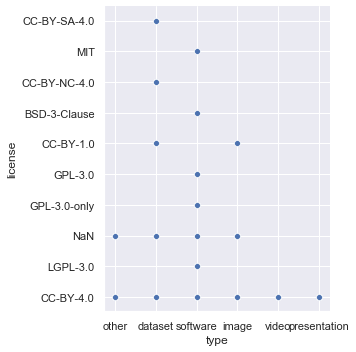

In [62]:
sns.relplot(x='type', y='license', data=df)

In [ ]:
#plt.savefig('../type_license.png', dpi=150)

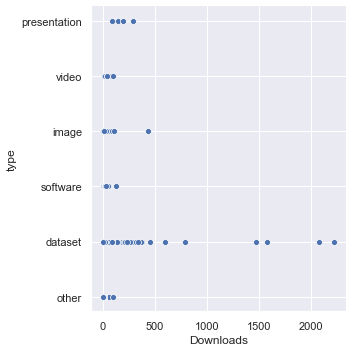

In [63]:
sns.relplot(y='type', x='Downloads', data=df)

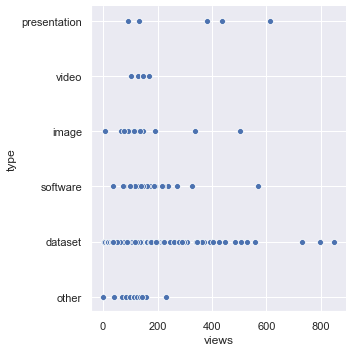

In [64]:
sns.relplot(y='type', x='views', data=df)

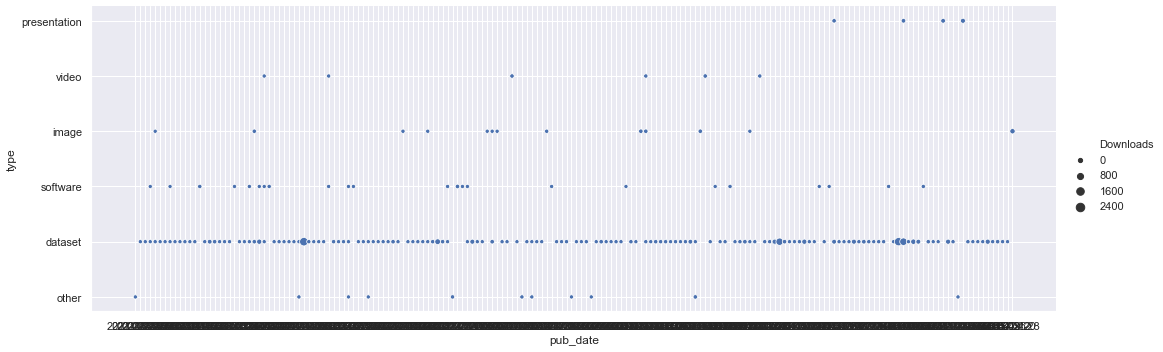

In [65]:
#Problem: Wie kann ich hier nur bestimmte Daten zb 2021 in die Darstellung einbringen?
sns.relplot(x='pub_date', y='type', 
            size='Downloads',
            #row='license', 
            #col='license', 
            data=df,
            height=5, aspect=3)

In [ ]:
sns.catplot(x='pub_date',
            data=df, kind='count', color="steelblue", height=5, aspect=3)

In [ ]:
plt.plot(df['pub_date'][df['pub_date'] >= '2021-06-01'], df['views'][df['pub_date'] >= '2021-06-01'], color='#4870a0', marker='o')

In [ ]:
#plt.plot(df['pub_date'][date_filter], df['views'][date_filter], color='#4870a0', marker='o')

In [ ]:
start_date = '2021-01-01'
plt.plot(df['pub_date'][df['pub_date'] >= start_date], df['views'][df['pub_date'] >= start_date], color='#4870a0', marker='o')

In [ ]:
plt.stackplot(df['pub_date'], 
              df['unique_views'], 
              df['views'],
              alpha=0.75,
              colors=['#7289da','#f29fa9'],
              labels=['unique_views', 'views'])

In [66]:
# Verteilung der Downloadzahlen pro Access-Recht
df.groupby(['Access_Right','Downloads']).sum()

rel_id  unique_downloads  unique_views  views  \
Access_Right Downloads                                                  
closed       0              31                 0          1790   3007   
             1               1                 3           173    256   
             2               1                 2            94    166   
             4               1                 3            38     80   
             5               1                 3            23     33   
...                        ...               ...           ...    ...   
restricted   36              0                 4            80     98   
             38              0                 2            93    126   
             68              0                51            69     91   
             83              0                42           279    370   
             202             0                14            88    124   

                        isreferencedby  
Access_Right Downloads                  
closed       0                      31  
             1                       1  
             2                       1  
             4                       1  
             5                       1  
...                                ...  
restricted   36                      0  
             38                      0  
             68                      0  
             83                      0  
             202                     0  

[110 rows x 5 columns]